Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8800 - loss: 0.4350 - val_accuracy: 0.9596 - val_loss: 0.1360
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9656 - loss: 0.1213 - val_accuracy: 0.9716 - val_loss: 0.0945
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9759 - loss: 0.0806 - val_accuracy: 0.9740 - val_loss: 0.0829
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9832 - loss: 0.0580 - val_accuracy: 0.9746 - val_loss: 0.0809
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9876 - loss: 0.0401 - val_accuracy: 0.9777 - val_loss: 0.0733
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9904 - loss: 0.0320 - val_accuracy: 0.9771 - val_loss: 0.0779
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9918 - loss: 0.0271 - val_accuracy: 0.9775 - val_loss: 0.0773
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9935 - loss: 0

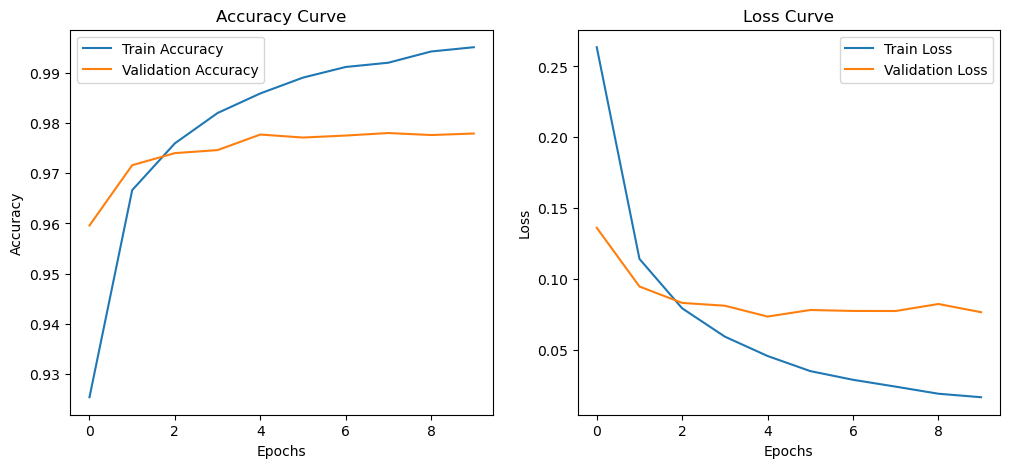

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to [0,1] range
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build a simple neural network
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten 28x28 images
    Dense(128, activation='relu'),  # Hidden layer with ReLU
    Dense(10, activation='softmax')  # Output layer (10 classes)
])

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32)

# Plot accuracy and loss curves
def plot_learning_curves(history):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy Curve')

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss Curve')

    plt.show()

# Display the accuracy and loss curves
plot_learning_curves(history)